In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
from pymatgen.matproj.rest import MPRester
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve
plt.style.use("ggplot")

In [27]:
df_table = pd.read_csv("compound_table_ave_regression.csv").set_index('name')
df_matpro = pd.read_csv("matpro_data_regression_processed.csv").set_index('name')
df_matpro = df_matpro.ix[df_table.index,:]
df = pd.concat([df_table, df_matpro], axis=1)
scaled_list = []
for i in np.array(df.columns):
    sc = StandardScaler()
    sc.fit(df.ix[:,i])
    array_scaled = sc.transform(df.ix[:,i])
    scaled_list.append(array_scaled)
df_std = pd.DataFrame(scaled_list).T
df_std.index = np.array(df.index)
df_std.columns = np.array(df.columns)
df

/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if

,Z,Period,Group,m,kai,EA,IE1,IE2,Rvdw,Rcov,...,BP,Cp_g,Cp_mol,rho,E-fusion,E-vapor,ThermalConductivity,energy,energy_per_atom,volume
name,,,,,,,,,,,,,,,,,,,,,
Al2O3,10.000000,2.400000,14.800000,20.392000,2.708000,1.053073,10.565137,28.604080,1.648000,0.880000,...,1170.972800,0.909600,27.306800,1.937400,4.413200,118.366540,0.948160,-297.961858,-7.449046,378.819910
Al2S3,14.800000,3.000000,14.800000,30.034000,2.192000,1.422672,8.610313,21.534148,1.816000,1.120000,...,1547.516000,0.783600,23.300000,2.256000,5.318000,122.320000,0.949614,-134.620398,-4.487347,913.381140
Al2Se3,25.600000,3.600000,14.800000,58.168000,2.174000,1.388400,8.245741,20.245420,1.876000,1.204000,...,1691.750000,0.551400,24.897800,3.971400,7.520000,132.112000,0.960240,-44.347313,-4.434731,260.866422
Al2Te3,36.400000,4.200000,14.800000,87.352000,1.904000,1.358880,7.800067,18.691420,1.972000,1.318000,...,1873.550000,0.480000,25.118000,4.824000,14.780000,146.698000,0.962100,-153.393600,-3.834840,1465.793182
AlAs,23.000000,3.500000,14.000000,50.950000,1.895000,0.625500,7.887184,18.708875,1.845000,1.220000,...,1840.650000,0.613000,24.420000,4.213500,19.200000,161.600000,1.436000,-8.819424,-4.409712,37.488247
AlBr3,29.500000,3.750000,16.000000,66.670000,2.622500,2.634000,10.356792,20.900388,1.847500,1.187500,...,947.000000,0.579750,62.817500,3.015000,7.025000,83.743750,0.593415,-52.489721,-3.280608,668.264798
AlCl3,16.000000,3.000000,16.000000,33.332500,2.772500,2.823000,11.222164,22.567338,1.772500,1.060000,...,877.370000,0.583500,31.511750,3.085500,5.075000,80.350000,0.592567,-30.617016,-3.827127,199.902753
AlF3,10.000000,2.250000,16.000000,20.995000,3.387500,2.659500,14.563542,30.935237,1.562500,0.760000,...,761.817500,0.842250,29.528000,1.947000,2.870000,75.152350,0.592709,-44.299628,-5.537454,79.013103
AlI3,43.000000,4.500000,16.000000,101.920000,2.397500,2.404575,9.334887,19.055612,1.945000,1.330000,...,1041.200000,0.384750,46.872500,4.380000,8.495000,88.375000,0.595867,-43.978668,-2.748667,845.059650


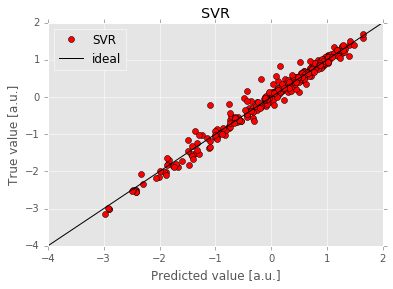

RMSE: 0.154125
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}


In [74]:
df = pd.read_csv("compound_table_ave_regression_std.csv")
df.rename(columns={df.columns[0]:"Compounds"},inplace=True)
df = df.set_index("Compounds")
df_x = df.drop(['energy','energy_per_atom','volume'], axis=1)
x = np.array(df_x.values.tolist())
y = np.array(df["energy_per_atom"])

def svr():
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [10**i for i in range(-4,1)], 'C': [10**i for i in range(0,4)]}]
    gscv = GridSearchCV(svm.SVR(), tuned_parameters, cv=4, scoring="mean_squared_error")
    gscv.fit(x, y)
    reg_best = gscv.best_estimator_
    x_line = range(-4,3)
    y_line = x_line
    plt.plot(reg_best.predict(x),y,'ro',label='SVR')
    plt.plot(x_line,y_line,'k-',label='ideal')
    plt.xlabel('Predicted value [a.u.]')
    plt.ylabel('True value [a.u.]')
    plt.title('SVR')
    plt.legend(loc='upper left',numpoints=1)
    plt.show()
    print ("RMSE: %f" % np.sqrt(-gscv.score(x,y)))
    print gscv.best_params_
#     print ("MSE(training): %f , MSE(test): %f" % (-train_scores, -test_scores))
    # print ("MSE: %f (+/- %f)" % (-scores.mean(), scores.std() * 2))
    # print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

svr()